<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px;"> 
# Plotting with Pandas
***
Week 2 | Lesson 5.1


### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Generate bar charts
- Generate scatter plots
- Generate time series plots

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   | Plotting with Pandas  |
| 20 min  | [Demo / Guided Practice](#demo)  | bar plots  |
| 20 min  | [Demo / Guided Practice](#demo)  | scatter plots  |
| 20 min  | [Demo / Guided Practice](#demo)  | time series plots  |
| 20 min  | [Independent Practice](#ind-practice)  |   |
| 5 min  | [Conclusion](#conclusion)  |   |

---

<a name="Plotting with Pandas"></a>
## Introduction: Plotting with Pandas (5 mins)

As we already learned in Week 1, there are several ways to plot: 
 - seaborn 
 - plotly 
 - matplotlib. 
 
Pandas provides a convenient way to access matplotlib's plot bindings via a method that is available on every single **DataFrame** object and **DataFrame Group** object.  When we load **seaborn**, many of its **matplotlib** equivelents are available via your dataframe object by adding a **.plot()** to call the plotting methods that are bound within Pandas plotting features.
 

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, 
sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, 
legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, 
xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, 
xerr=None, secondary_y=False, sort_columns=False, **kwds)

[Pandas Documentation: df.plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

## Generally, Pandas .plot() method is:
    
 -  Consistent
 -  Predictable
 -  Easy to remember common parameters
    
It's recommended that you learn to use .plot() to be able to navigate plotting features quickly, but use specfic libraries like **seaborn** when a higher level of visual customization is desired.  

## 5 Mins:  Have you been working with plotting outside lessons / labs?

**Additionally:**

 - What is difficult about plotting?
 - Is there anything you thought would be harder than it was with plotting?


## Let's slice our data a few ways first.

First, a more interesting dataset than random numbers.

In [2]:
import pandas as pd

sales_df = pd.read_csv("http://pbpython.com/extras/sample-salesv2.csv")
sales_df.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


We are going to slice our customer sales data by column to only **name, ext price, date**, then display the first 20 rows.

In [3]:
# We are going to 
customers = sales_df[['name','ext price','date']]
customers.head(20)

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27
5,"Kerluke, Reilly and Bechtelar",897.94,2013-12-04 02:07:05
6,Cole-Eichmann,275.04,2014-04-09 16:15:03
7,Hegmann and Sons,551.46,2014-06-18 19:25:10
8,"Senger, Upton and Breitenberg",649.23,2014-02-10 05:55:56
9,"Kerluke, Reilly and Bechtelar",323.76,2014-05-20 00:21:28


In [4]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

In [5]:
sales_totals = customer_group.sum()
sales_totals.sort_values('ext price')

,ext price
name,
"Davis, Kshlerin and Reilly",19054.76
Huel-Haag,21087.88
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Heidenreich-Bosco,25428.29
Koelpin PLC,26811.66
Kilback-Gerlach,26987.20
"Kuphal, Zieme and Kub",27031.86
"Kerluke, Reilly and Bechtelar",27389.43


## Plotting Basic Elements

Normally, just calling your dataframe and then ".plot()" at the end, will produce a plot.  One way to control visual elements such as title, and x/y labels, is to save your plot in a variable, then call various plot specific methods set the various aspects to this.

Also, don't forget to turn plotting on in your notebook by setting `%matplotlib inline`.

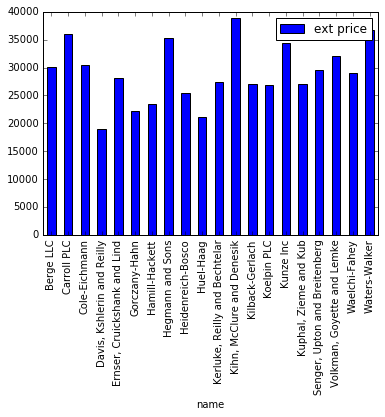

In [6]:
%matplotlib inline

my_plot = sales_totals.plot(kind='bar')

### Now to set visual elements "title" and "xlabel"

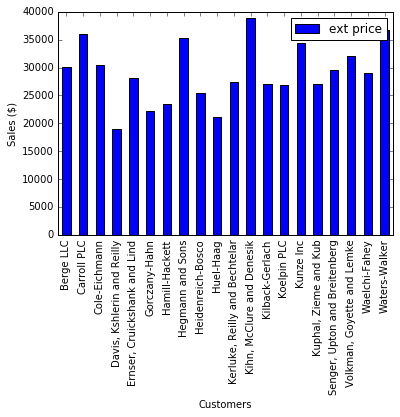

In [7]:
my_plot = sales_totals.plot(kind='bar')
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

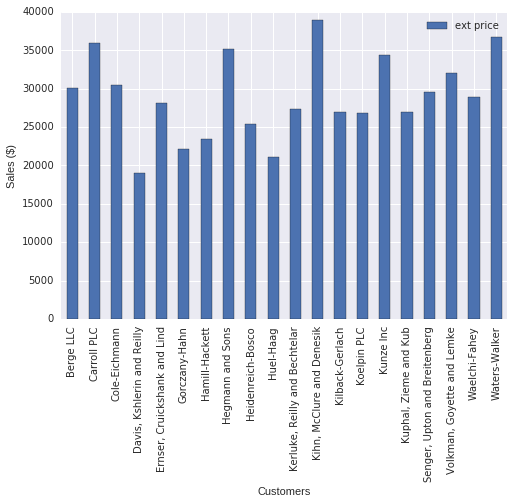

In [8]:
# Importing seaborn will bind it's methods to Pandas .plot()
import seaborn as sns

my_plot = sales_totals.plot(kind='bar')
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

## Let's try something a bit more simple

In [9]:
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.915889,-0.139916,-0.700202,0.824603
1,-1.559253,-0.455830,-0.949232,-1.570375
2,-0.317323,-0.662577,0.389344,0.401152
3,-0.542088,0.541732,-0.188486,-0.199255
4,0.802994,0.631007,-1.043118,-0.375677
5,-0.186894,-0.517993,-1.007410,0.083125
6,1.164011,0.158458,0.368180,-1.304354
7,1.197083,-0.352791,0.157006,1.388405
8,1.423336,2.251263,0.722240,-1.802169
9,-0.120506,-0.155333,0.477189,-0.649362


### A basic bar plot with random data and 4 variables

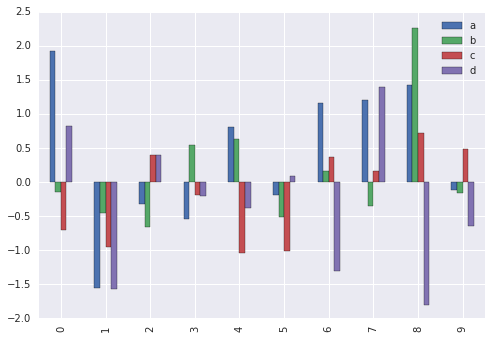

In [10]:
df.plot(kind='bar')

### Now stacked bars

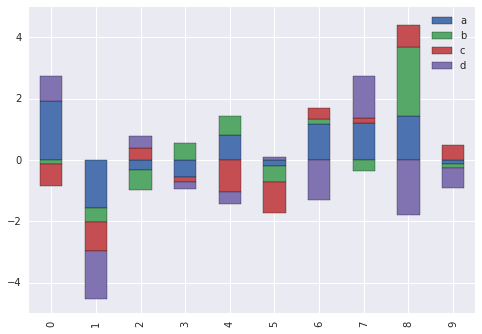

In [11]:
df.plot(kind='bar', stacked=True)

### Stacked Bar, Horizontally

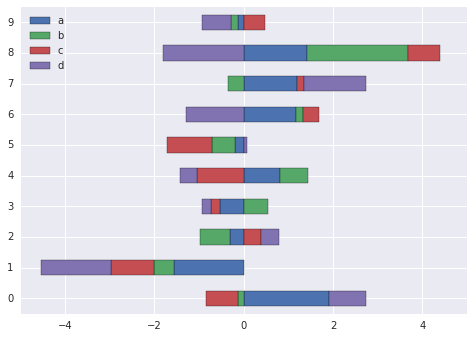

In [12]:
df.plot(kind='barh', stacked=True)

## Help me set the title and 1 label!

More refernece here:  [Pandas Docs: bar plots](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)

# df.plot( kind = "????" )

With **DataFrames** or **DataFrame groups**, you can set the type with the "kind" parameter.  Check the docs for a full list.  

For scatter it's simply **kind="scatter"**.

Some plot "kinds" have specific requirements.  For instance, a scatter plot requires X and Y axis data in order to work correctly.  If you have more than 2 numeric series items in your dataframe, you need to decide which 2 to plot.



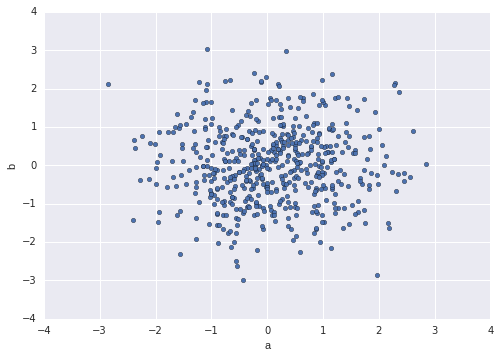

In [13]:
df = pd.DataFrame(np.random.randn(550, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='b')

_If you recall: In the case of an sns.pairplot, each numeric variable is plotted against each other for x / y display._

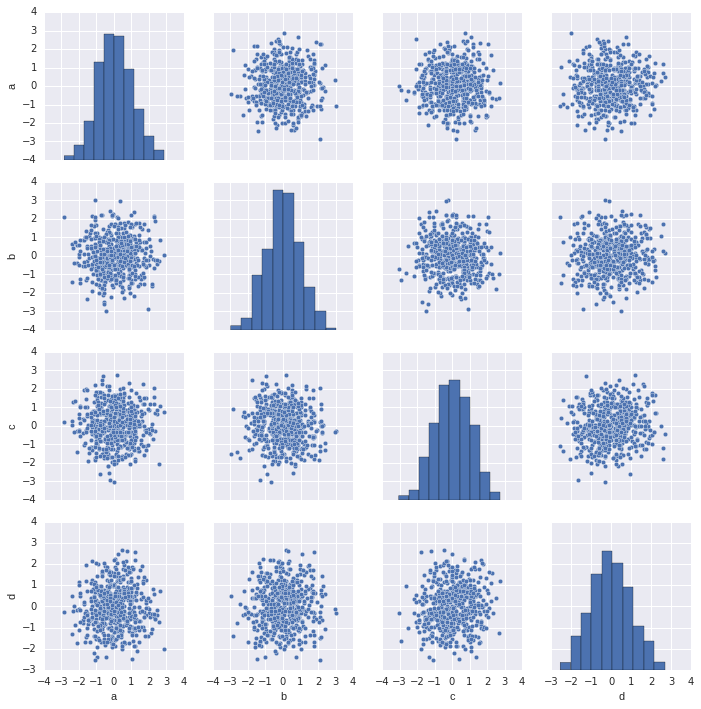

In [14]:
sns.pairplot(df)

To plot multiple column groups in a single axes, repeat plot method specifying target 
'ax'. It is recommended to specify color and label keywords to distinguish each groups.

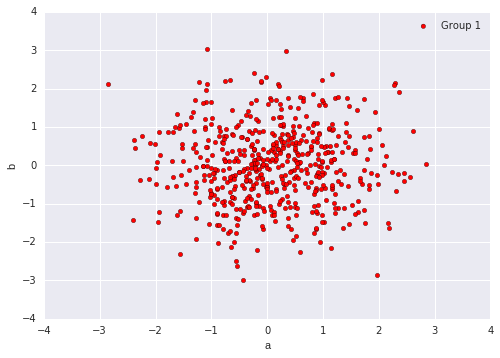

In [15]:
ax = df.plot(kind='scatter', x='a', y='b', color='Red', label='Group 1')

Using an "ax", we can add multiple plots in the same space

In [25]:
# This should work but it doesn't appear to work at the moment -- pardon the issue will need to revisit this example
# in the near future..
df.plot(kind='scatter', x='a', y='c', color='Green', label='Group 1', ax=ax)

KeyError: 'a'

[Pandas: scatter plots](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)

## Demo/Guided Practice: time series plots (20 mins)

This is a very gentle introduction to timeseries.  The main thing we want to do when we plot this type of data, is deal with an index that is a datetime type, rather than an INT or an object so we can apply resampling.

Resampling the date allows us to easily slice our data based on unit of time such as:
 - Week number
 - Week day
 - Month day
 - year
 - Month number
 - etc

The problem we usually encounter, is that we recieve date data as "object" once it makes its way to a dataframe.  The process for dealing with this is:

 - Convert date string to **datetime dtype**
 - Set the dataframe index as the converted **datetime dtype**


In [17]:
from datetime import datetime

In [18]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', 
'2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', 
'2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', 
'2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', 
'2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
df

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [19]:
# Looks like the date column is an "object" - remember what this is?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
date             10 non-null object
battle_deaths    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 232.0+ bytes


In [27]:
df['battle_deaths_x100'] = df['battle_deaths'] * 100
df.reset_index()

,date,battle_deaths,battle_deaths_x100
0,2014-05-01 18:47:05.069722,34,3400
1,2014-05-01 18:47:05.119994,25,2500
2,2014-05-02 18:47:05.178768,26,2600
3,2014-05-02 18:47:05.230071,15,1500
4,2014-05-02 18:47:05.230071,15,1500
5,2014-05-02 18:47:05.280592,14,1400
6,2014-05-03 18:47:05.332662,26,2600
7,2014-05-03 18:47:05.385109,25,2500
8,2014-05-04 18:47:05.436523,62,6200
9,2014-05-04 18:47:05.486877,41,4100


In [30]:
df.index = df['date']
df['date'] = pd.to_datetime(df['date'])

KeyError: 'date'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
date             10 non-null datetime64[ns]
battle_deaths    10 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 232.0 bytes


### Set df['date'] as the index and delete the column

In [22]:
df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


### Find the total value of battle_deaths per day

**NOW with our new datetime index, we can apple the resample function to give us grouping by "days" (ie: "D").**

In [23]:
df.resample('D').sum()

,battle_deaths
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103


### Almost every Pandas object can use .plot()

Let's view the battle deaths per day now.

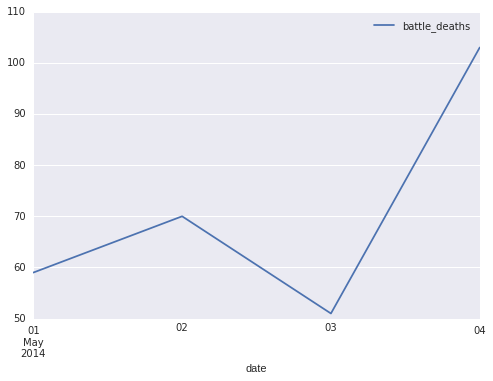

In [24]:
df.resample('D').sum().plot()

<a name="ind-practice"></a>
## Independent Practice: Topic (20 minutes)

Using the sales.csv data, do the following
- Create a stacked bar plot of Rep and Price
- Create a stacked bar plot of Rep and Quantity

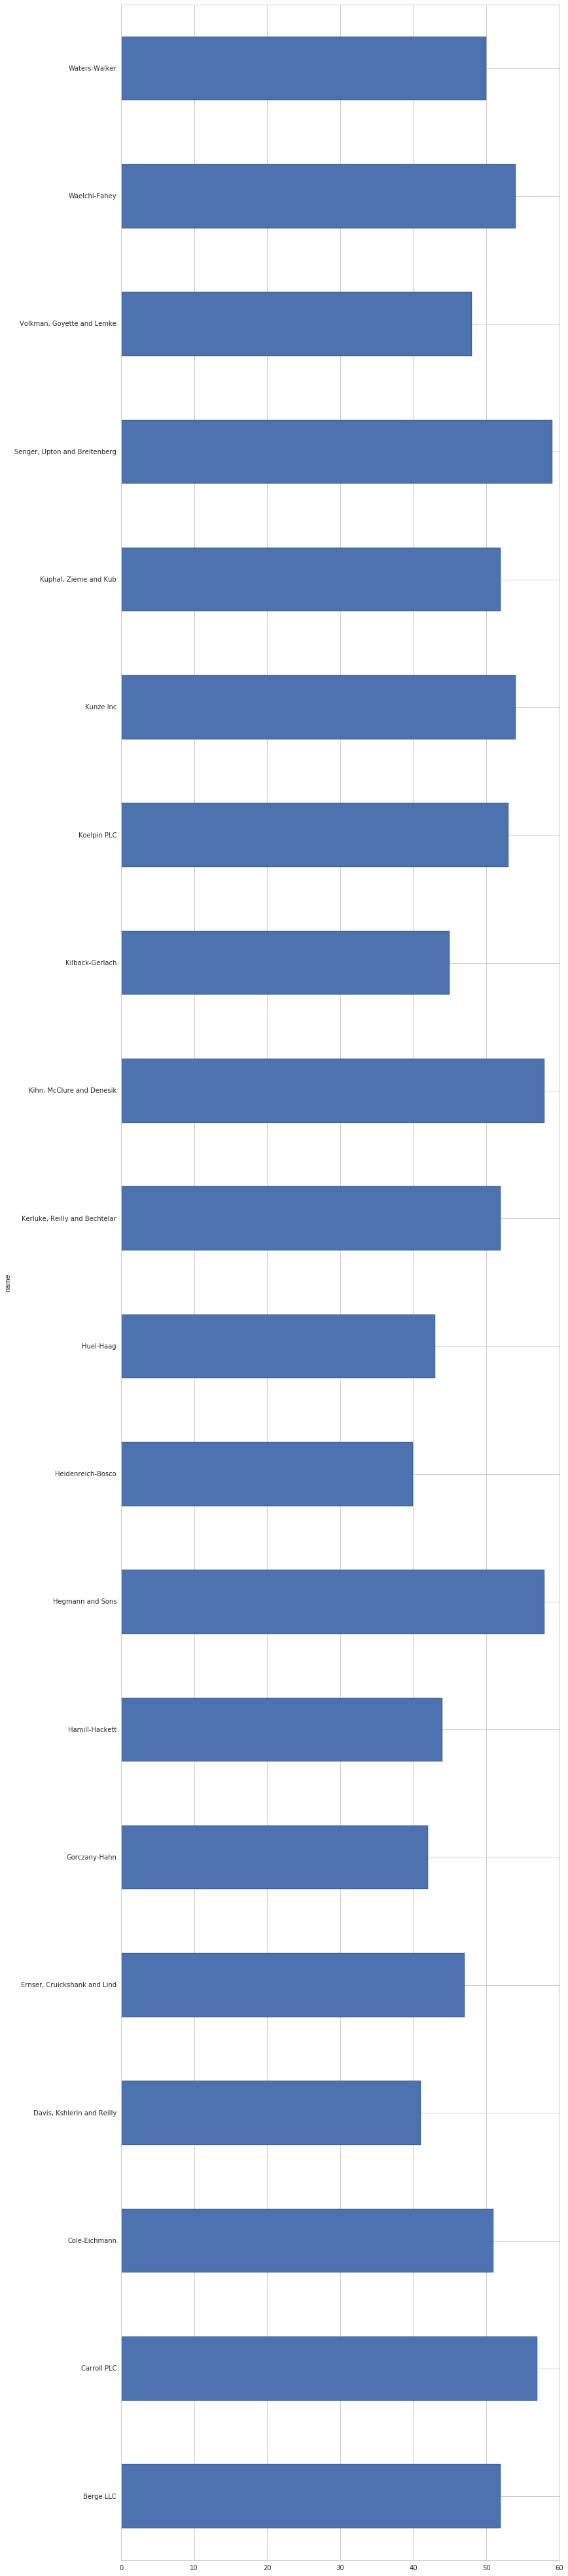

In [52]:
# sales_df.head()

plot1 = sales_df.groupby(['name'])['unit price'].count()

# sns.set(style = 'whitegrid', rc = {'figure.figsize':(12, 70)})
plot1.plot(kind='barh', stacked=True)
# plot1

<a name="conclusion"></a>
## Conclusion (10 mins)

As we saw in the introduction, df.plot can take a lot of parameters. Try adding some
of them to the plots you created during independent practice. 